In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Loading All Required Libraries

In [1]:
import numpy as np
import pandas as pd
from random import sample
from numpy.random import uniform
from math import isnan

#for hopkins statistics
from sklearn.neighbors import NearestNeighbors

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Library for Scaling
from sklearn.preprocessing import StandardScaler

#Library for Modeling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Library for creating Hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#for split the dataset for training purpose
from sklearn.model_selection import train_test_split

# For evaluation purpose
from sklearn import metrics
from sklearn.metrics import silhouette_score

#For prediction purpose
from sklearn.linear_model import LogisticRegression

In [2]:
sns.set_style("white")
%matplotlib inline

### Data understanding and EDA

In [4]:
df_country = pd.read_csv("Country-data.csv")

In [5]:
dd = pd.read_csv("data-dictionary.csv")
#dd

In [6]:
df_country.shape

(167, 10)

In [7]:
#No missing data in any columns. Only 1 columns of Object type
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
# Check Null values in any column
df_country.isna().sum(axis=0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
# Check Null values in any Row
df_country [ df_country.isna().sum(axis=1)>0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [10]:
# Check the head of the dataset
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
#Converting percentage of exports, imports, health into values of exports/imports/health /person
df_country['exports'] = round(df_country['exports']*df_country['gdpp']/100,2)
df_country['imports'] = round(df_country['imports']*df_country['gdpp']/100,2)
df_country['health']  = round(df_country['health']*df_country['gdpp']/100,2)

#Creating 2 extra features 
#1: Child_mortality_Fertality_Ratio. 
#2: Life_expectency_Fertality_Ratio.
df_country['child_mort_fer_ratio'] = round(df_country['child_mort'] / df_country['total_fer'],2)
df_country['life_expec_fer_ratio'] = round(df_country['life_expec'] / df_country['total_fer'],2)

In [12]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_fer_ratio,life_expec_fer_ratio
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,15.50,9.66
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,10.06,46.24
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,9.45,26.47
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,19.32,9.76
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,4.84,36.06


In [13]:
#check if there is any jerk in the data for given features
df_country.describe( percentiles=[.25,.50,.80,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_fer_ratio,life_expec_fer_ratio
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689,10.622754,31.169222
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809,7.976585,15.740780
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.180000,7.850000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000,4.615000,15.615000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000,8.880000,30.290000
80%,66.320000,10194.960000,1274.646000,9854.720000,29420.000000,12.500000,78.200000,4.592000,21020.000000,16.916000,46.328000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000,20.806000,53.516000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000,22.605000,57.068000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000,30.400400,61.595600


In [14]:
#Using StandardDeviation technique, Scale the data
scaler = StandardScaler()
df_country_scaled = df_country.drop(columns=["country"])
df_country_scaled = pd.DataFrame(scaler.fit_transform(df_country_scaled), columns=df_country_scaled.columns)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


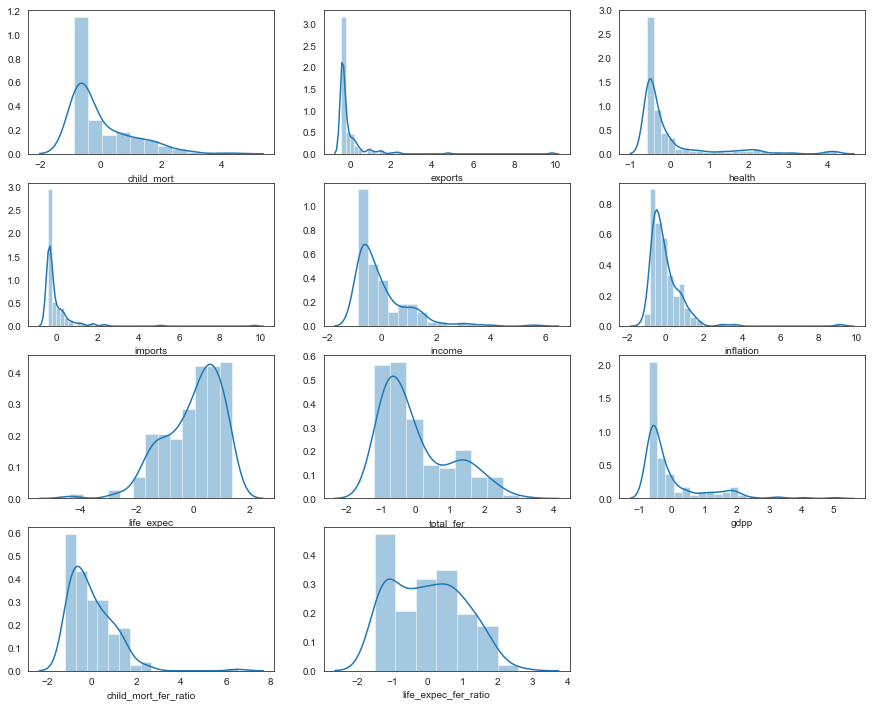

In [15]:
#Check the distribution of each feature of the dataset
#data is normally distributed or left tailed or Right tailed or bimodal distriution

l= list(df_country_scaled.columns)
j=1
plt.figure(figsize=(15,28))
for i in l:
    plt.subplot(9,3,j)
    sns.distplot(df_country_scaled[i])
    j+=1

plt.tight_layout
plt.show()

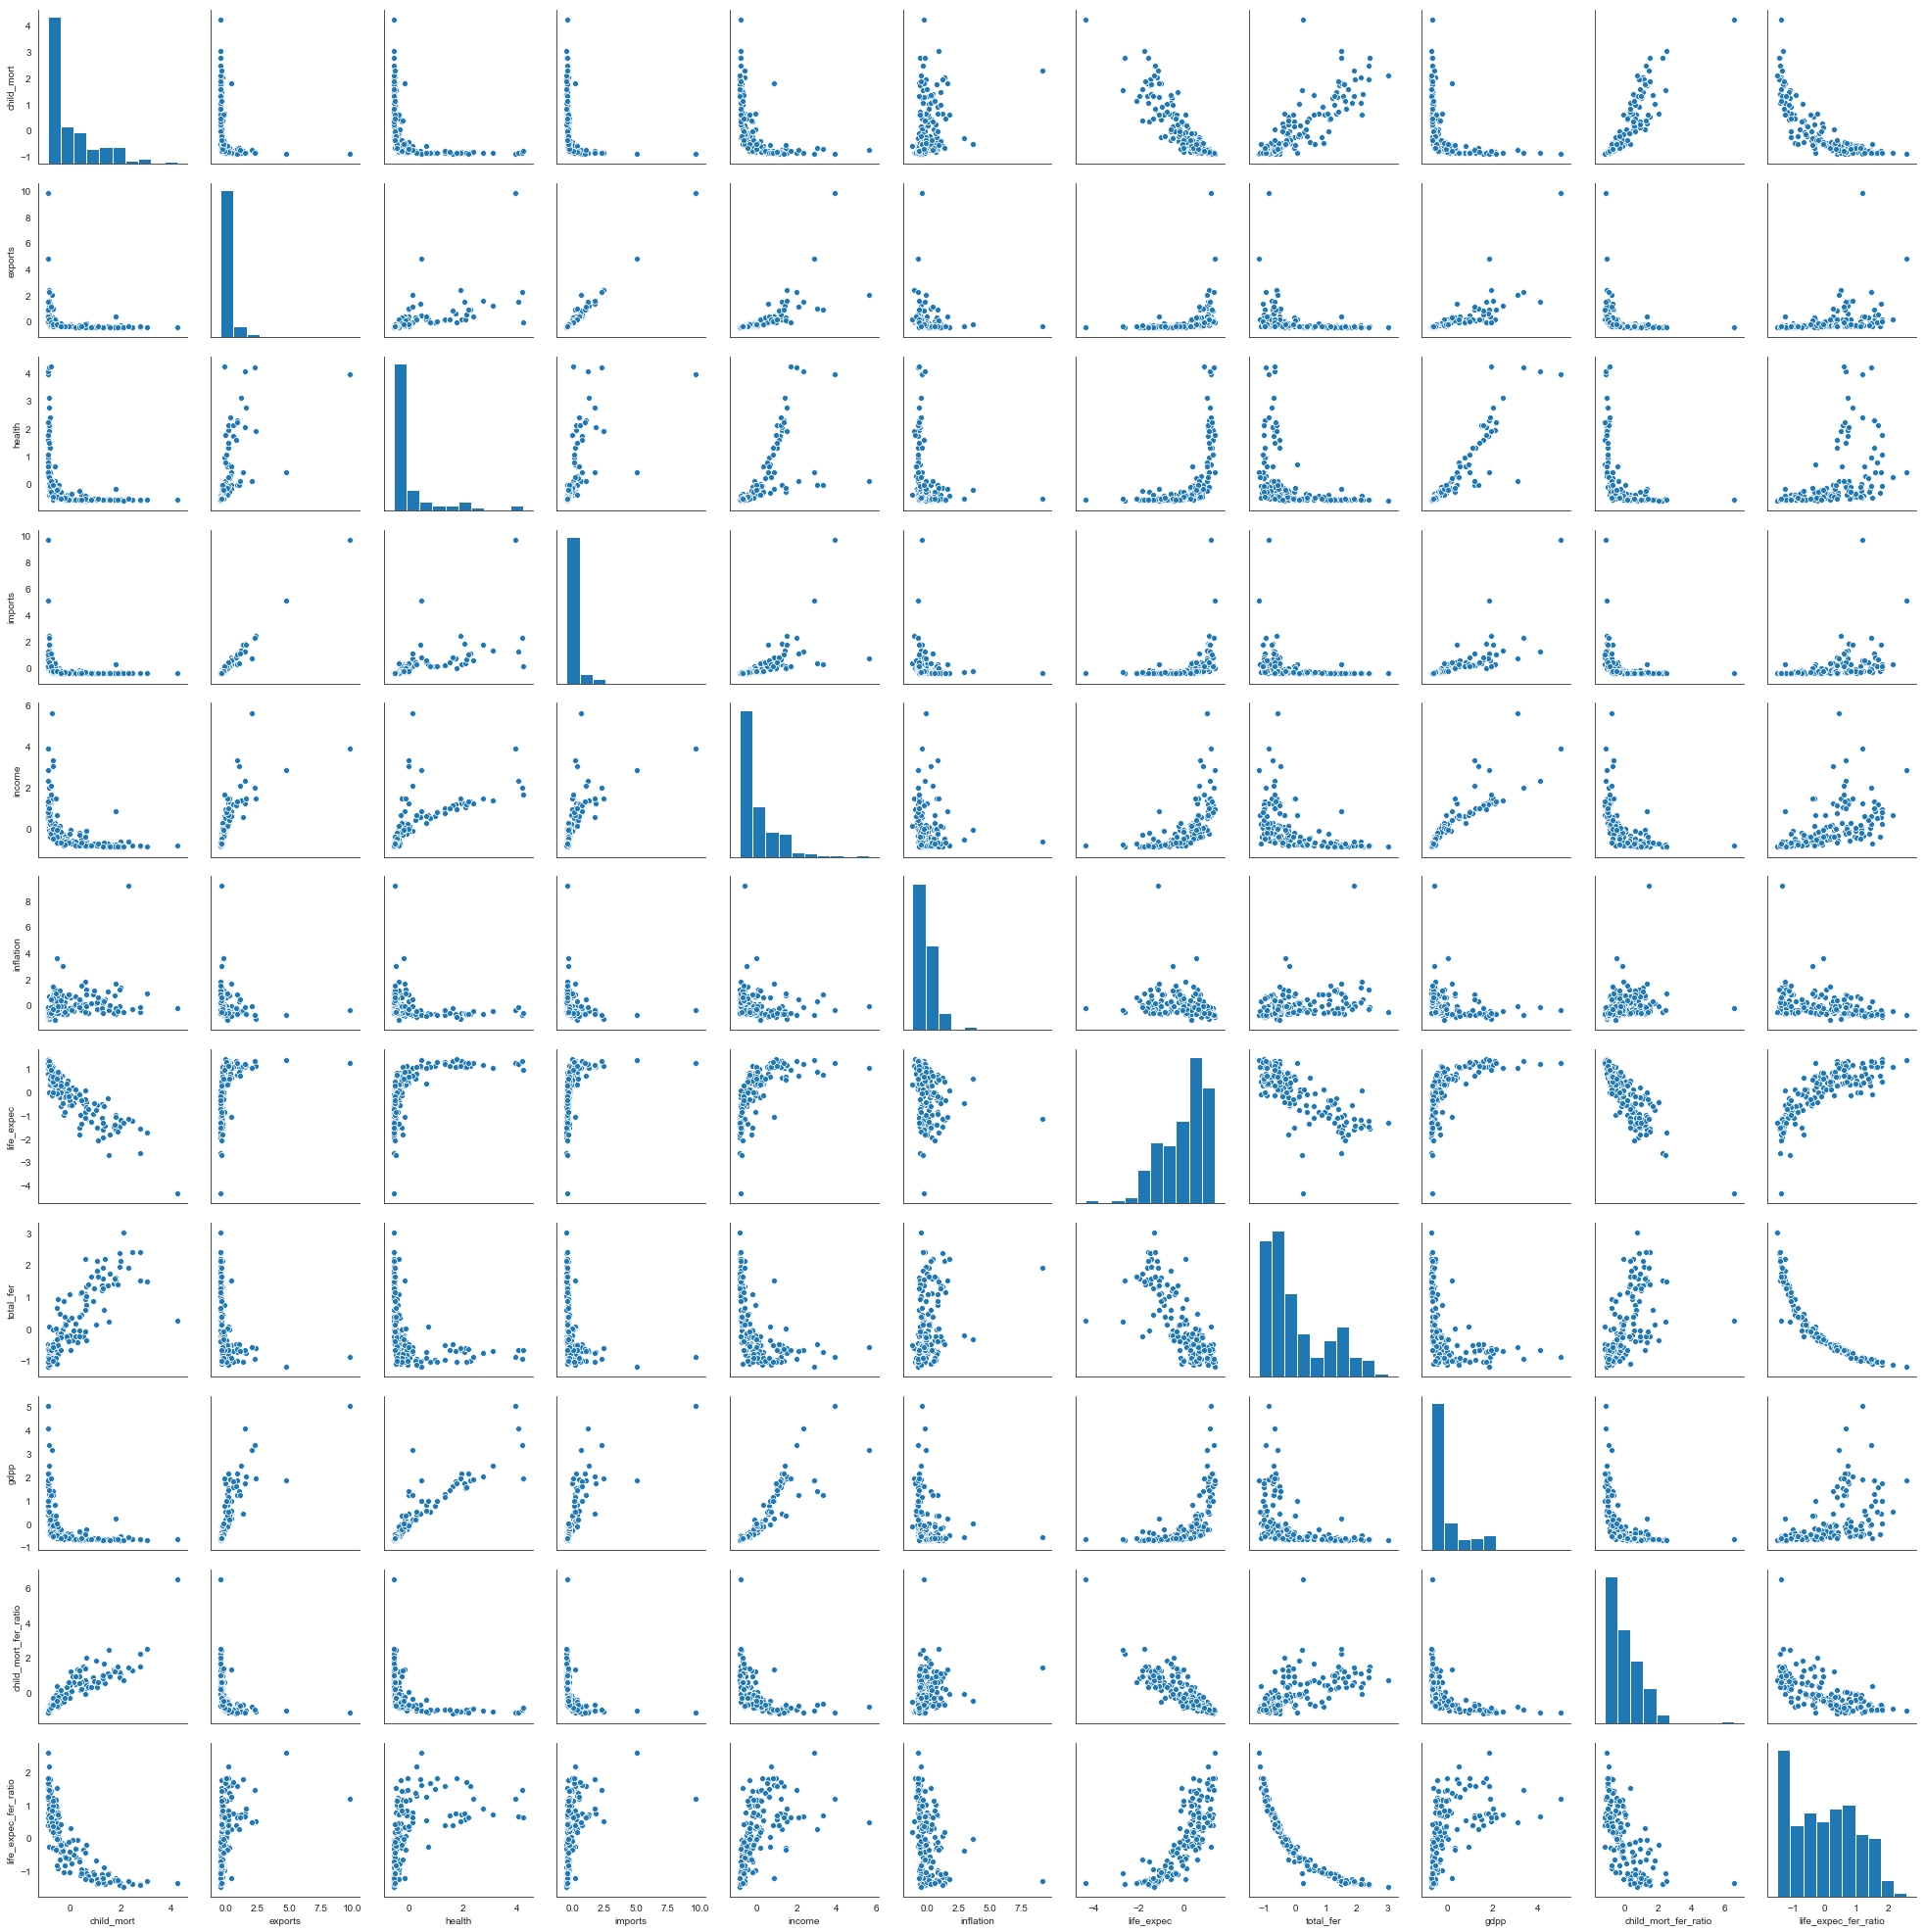

In [16]:
#Check relationships and their shape for various columns with each other
sns.pairplot(df_country_scaled)
plt.show()

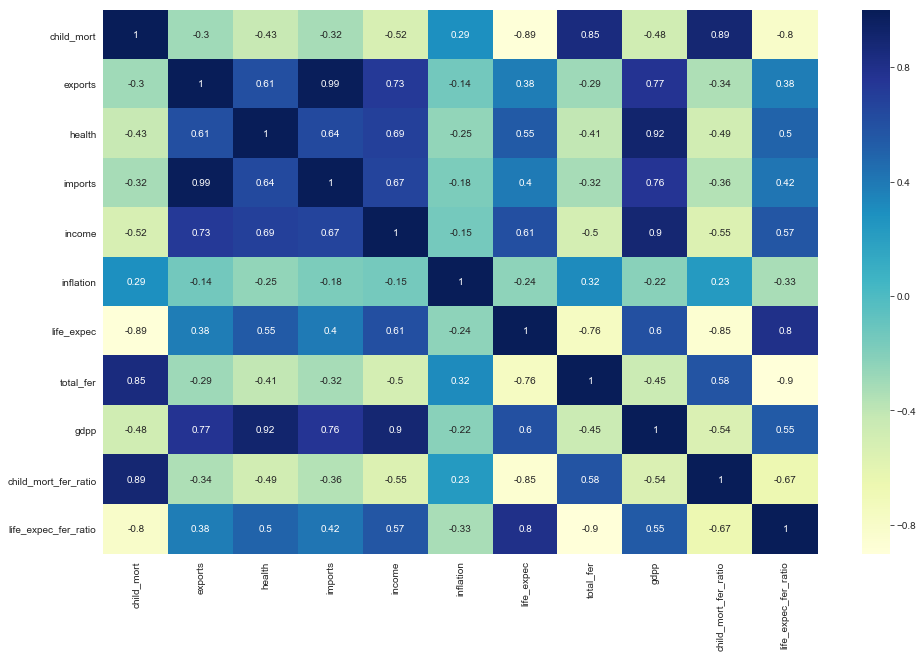

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_country_scaled.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [18]:
#Child_Mortality has high correlationship with Life_expec_Fer_Ratio, Child_Mort_Fert_Ratio, Total_Fert, Life_Exp
#Export has high correlationship with gdpp, income, import, health
#Health has high correlationship with gdpp, life_expectency, income, import
#Import has high coorelationship with gdpp, health, export
#Income has high correlationship with gdpp, life_expectency, health

#Life Expectency has high correlationship with life_expec_fer_ratio, Child_mort_fer_ratio, GDPP, Total_Fer, income & child_mortality
#total_fertility has high correlationship with life_expec_fer_ratio, mort_fer_ratio, life_expectancy, child_mortality
#GDPP has has high correlationship with life_expectency, income, import, health, export
#Child_Mortality_Fertality_Ratio has high correlationship with Life_expec_fer_ratio, total_fertality, life_expectency, child_mortality

#Interesting inflation does not have strong relationship with any of the variables. 
#Infact even income, exports has very week relationship with inflaction

### Create the Model

In [19]:
#Create model using PCA (Principle Component Analysis)
pca         = PCA(svd_solver="randomized",random_state=100)

#Converting normal data to PCA data
pca_country_scaled = pca.fit_transform(df_country_scaled)

#creating dataframe of above PCA data
df_pca_country_scaled = pd.DataFrame(pca_country_scaled, columns=df_country_scaled.columns)
df_pca_country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_fer_ratio,life_expec_fer_ratio
0,-3.095997,1.172587,-0.285476,-0.535268,-0.615088,0.002001,-0.053811,0.510791,-0.006670,0.094975,0.007559
1,0.420666,-1.559366,-0.187641,0.658238,0.246012,-0.150883,-0.281237,-0.137659,-0.005504,0.077425,-0.027680
2,-0.398347,-0.730145,0.942399,0.052513,-0.306088,0.004310,-0.027376,-0.552683,0.062482,-0.015195,-0.002642
3,-3.361284,1.848509,0.823814,-0.428254,-0.119911,-0.038654,-0.656442,0.058578,-0.017848,-0.029549,-0.000603
4,0.979376,-1.006142,-0.263723,0.035996,-0.458016,0.142192,0.032822,-0.153830,-0.003484,-0.122204,0.078283


### Is the Data good for Clustering?

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [20]:
def hopkins(X):
    d = X.shape[1]

    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),
                                            np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_pca_country_scaled)

0.8631551256302262

### Analyse Model Data

In [22]:
pca.components_[0]

array([-0.32103859,  0.27666039,  0.30534335,  0.28144608,  0.3279311 ,
       -0.13406546,  0.33754652, -0.30102189,  0.33926843, -0.31029808,
        0.32633516])

In [23]:
#actual features and their contribution in new PC components
colnames = list(df_country_scaled.columns)
pcs_df = pd.DataFrame({'PC01':pca.components_[0],'PC02':pca.components_[1],'PC03':pca.components_[2], 
                       'PC04':pca.components_[3],'PC05':pca.components_[4],'PC06':pca.components_[5],
                       'PC07':pca.components_[6],'PC08':pca.components_[7],'PC09':pca.components_[8],
                       'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'Feature':colnames})
pcs_df 

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,PC11,Feature
0,-0.321039,0.360129,-0.104709,-0.024494,0.214439,0.008839,-0.527517,-0.003950,0.016759,-0.642848,-0.133381,child_mort
1,0.276660,0.440889,-0.012084,0.382393,-0.250798,-0.023012,0.042102,-0.056335,-0.027739,0.123777,-0.705861,exports
2,0.305343,0.239046,-0.072035,-0.505221,0.324217,-0.515669,0.119678,0.029389,0.435267,0.048361,-0.105693,health
3,0.281446,0.415292,-0.054135,0.394160,-0.262230,-0.242014,-0.006036,-0.009899,0.108584,-0.133580,0.657969,imports
4,0.327931,0.213082,0.131425,-0.112091,0.159304,0.791073,-0.031861,0.057782,0.389657,0.018176,0.097622,income
5,-0.134065,0.122093,0.951407,0.100097,0.159352,-0.152503,0.030250,0.047114,-0.008238,0.000543,0.008470,inflation
6,0.337547,-0.258145,0.157093,-0.101349,-0.137398,-0.055032,-0.434604,-0.756860,0.021796,-0.018500,-0.005539,life_expec
7,-0.301022,0.329183,0.034623,-0.377254,-0.423395,0.013149,-0.421076,0.115308,0.000557,0.528384,0.090982,total_fer
8,0.339268,0.287884,0.011348,-0.307674,0.209756,0.079354,0.054069,-0.001736,-0.802221,-0.013514,0.101321,gdpp
9,-0.310298,0.245691,-0.177134,0.293606,0.565630,0.028281,0.036624,-0.435760,0.001969,0.449651,0.107771,child_mort_fer_ratio


In [24]:
sns.color_palette()


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

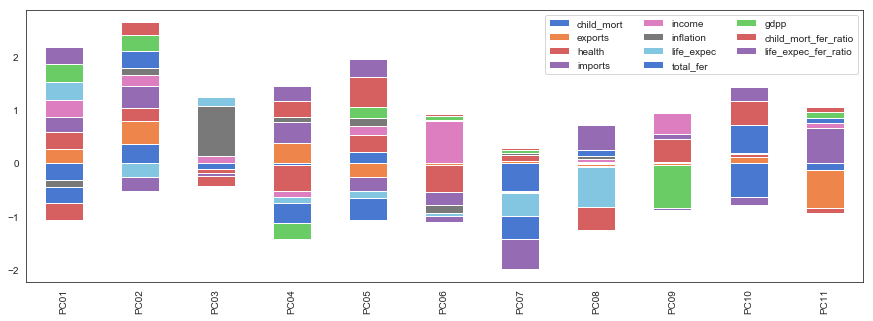

In [25]:
#Visualize which feature is contributing how much towards a particular PCA

from matplotlib.colors import ListedColormap
ax = pcs_df.set_index('Feature').reindex(pcs_df.set_index('Feature').sum().index, axis=1)\
      .T.plot(kind='bar', stacked=True,
              colormap=ListedColormap(  sns.color_palette("muted", n_colors=15)  ), 
              figsize=(15,5))
ax.legend(loc=1, ncol=3)
plt.show()

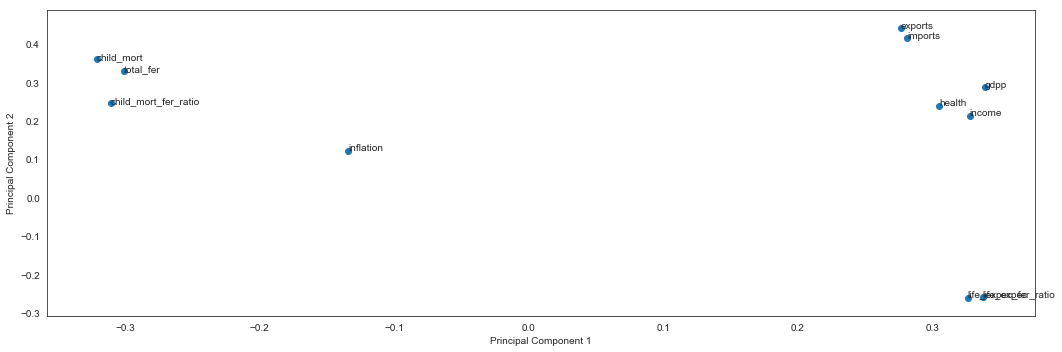

In [26]:
fig = plt.figure(figsize = (15,5))

plt.scatter(pcs_df.PC01, pcs_df.PC02)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC01[i],pcs_df.PC02[i]))
    
plt.tight_layout()
plt.show() 

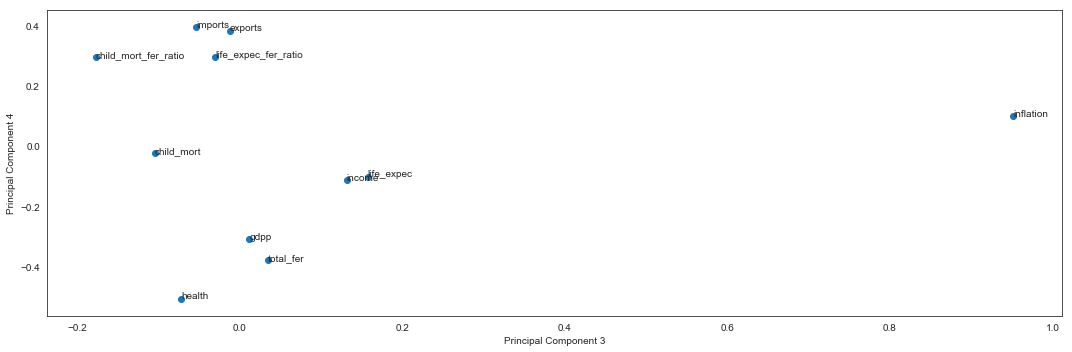

In [27]:
fig = plt.figure(figsize = (15,5))

plt.scatter(pcs_df.PC03, pcs_df.PC04)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')

for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC03[i],pcs_df.PC04[i]))
    
plt.tight_layout()
plt.show() 

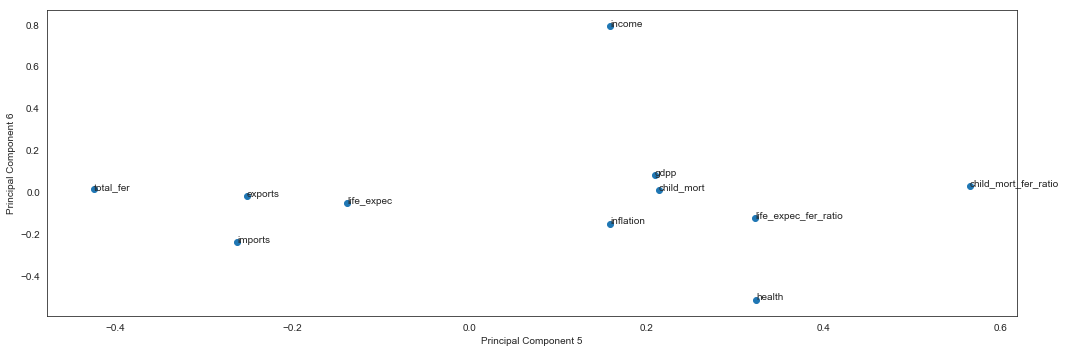

In [28]:
fig = plt.figure(figsize = (15,5))

plt.scatter(pcs_df.PC05, pcs_df.PC06)
plt.xlabel('Principal Component 5')
plt.ylabel('Principal Component 6')

for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC05[i],pcs_df.PC06[i]))
    
plt.tight_layout()
plt.show() 

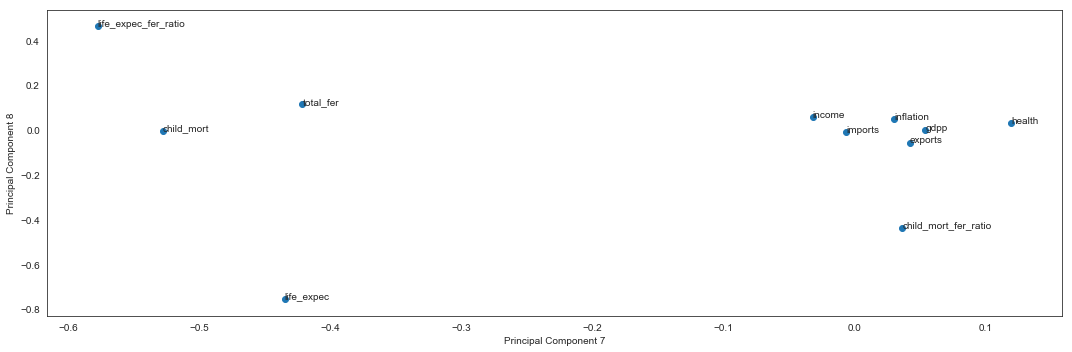

In [29]:
fig = plt.figure(figsize = (15,5))

plt.scatter(pcs_df.PC07, pcs_df.PC08)
plt.xlabel('Principal Component 7')
plt.ylabel('Principal Component 8')

for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC07[i],pcs_df.PC08[i]))
    
plt.tight_layout()
plt.show() 

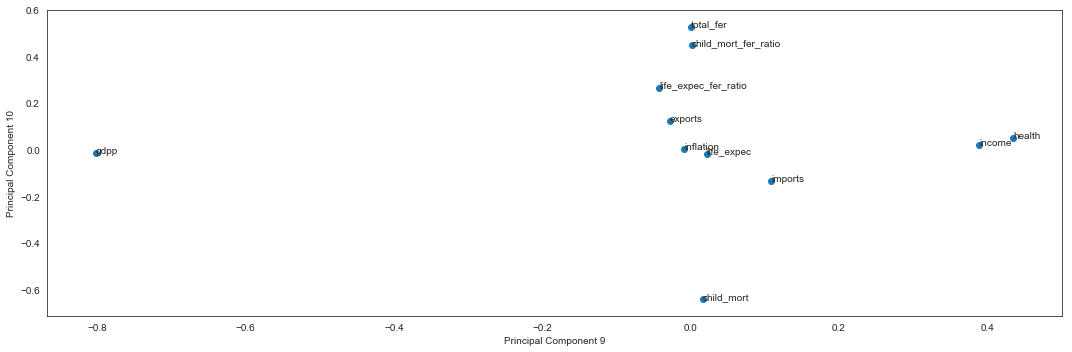

In [30]:
fig = plt.figure(figsize = (15,5))

plt.scatter(pcs_df.PC09, pcs_df.PC10)
plt.xlabel('Principal Component 9')
plt.ylabel('Principal Component 10')

for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC09[i],pcs_df.PC10[i]))
    
plt.tight_layout()
plt.show() 

In [31]:
#which PCA composnent explains how much variation
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [59.2 18.   8.3  5.3  4.3  2.5  1.2  1.   0.1  0.1  0. ]


#### 4 PCA can capture 90.73 varation in the data

In [32]:
# It will help us in picking 4 features (PCA) rather than 9 original features

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([59.18, 77.16, 85.48, 90.73, 95.05, 97.55, 98.74, 99.75, 99.88,
       99.96, 99.99])

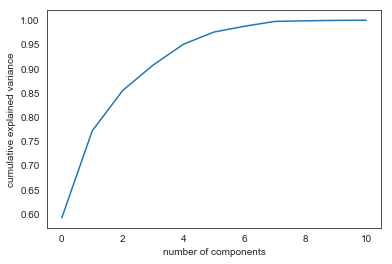

In [33]:
#Making the screeplot - plotting the cumulative variance against the original number of components
fig = plt.figure(figsize = (6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

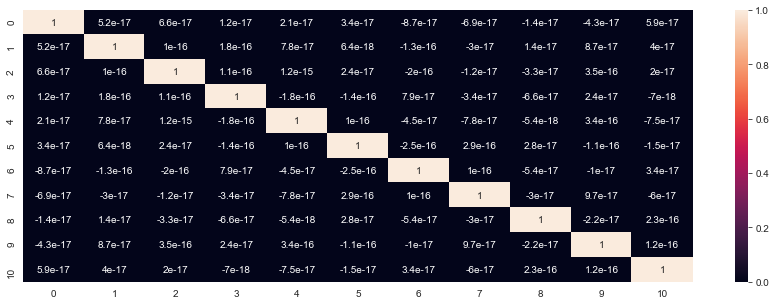

In [34]:
#This plot shows us that there no coleniarty between/ no relationship between different features with PCA features
plt.figure(figsize=(15,5))
corrmat = np.corrcoef(df_pca_country_scaled.transpose())
sns.heatmap(corrmat,annot = True)

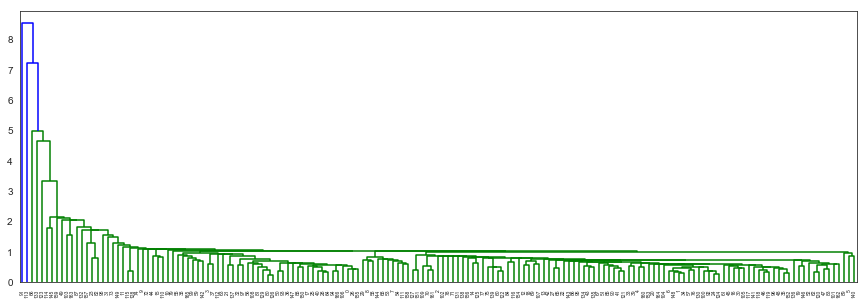

In [35]:
# plot a dendogram using single linkage
plt.figure(figsize=(15,5))
mergings = linkage(df_pca_country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

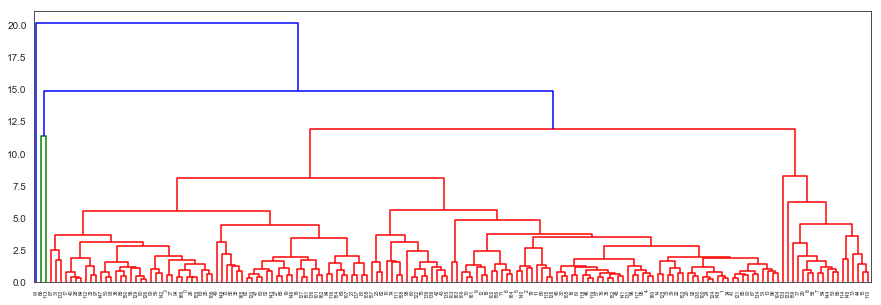

In [36]:
# plot a dendogram complete linkage
plt.figure(figsize=(15,5))
mergings = linkage(df_pca_country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [37]:
#Identify Clusters using Hierarchical Clustering Method
#If we cut the dendogram at 5 then we will get 10.
#If we cut the dendogram at 10 then we will get 5 clsuters. 

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [38]:
# Cluster Analysis using silhouette score & Elbow curve
sse_=[]
ssd =[]
for num_clusters in range(2,11):
    
    # intialise kmeans
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100).fit(df_pca_country_scaled)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_country_scaled, kmeans1.labels_)
    
    sse_.append([num_clusters, silhouette_avg])
    
    #score for elbow curve
    ssd.append(kmeans1.inertia_)

For n_clusters=2, the silhouette score is 0.3723905696427313
For n_clusters=3, the silhouette score is 0.3961891808536998
For n_clusters=4, the silhouette score is 0.39374755353009977
For n_clusters=5, the silhouette score is 0.3967049456144546
For n_clusters=6, the silhouette score is 0.29713217845011347
For n_clusters=7, the silhouette score is 0.29760776817476425
For n_clusters=8, the silhouette score is 0.2842902688319467
For n_clusters=9, the silhouette score is 0.2966304411865621
For n_clusters=10, the silhouette score is 0.2437715663782187


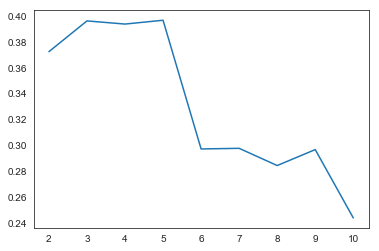

In [39]:
# silhouette analysis
# From this analysis it looks ideal number of cluster should be 5
for j in sse_:
    print("For n_clusters={0}, the silhouette score is {1}".format(j[0], j[1]))
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Elbow curve method

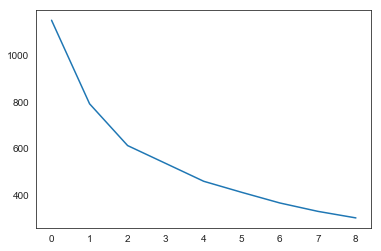

In [40]:
# From this analysis it looks ideal number of cluster should be 5
plt.plot(ssd)
plt.show()

#### Selecting Ideal Number of Clusters

In [41]:
#### Hierarchical clustering recommends 5 or 10 clusters would be good
#### silhouette score curve recommends 5 cluster would be good
#### Elbow curve recommends 5 clusters would be good

##### Identify Clusters using Hierarchical Clustering Method

In [42]:
#if we cut the dendogram at 5 that will gives has 10 clusters.

cluster_labels_hc = cut_tree(mergings, n_clusters=10).reshape(-1, )
cluster_labels_hc

#Number of contries in each cluster
pd.Series(cluster_labels_hc).value_counts()

1    66
0    33
4    31
3    16
2    16
9     1
8     1
7     1
6     1
5     1
dtype: int64

In [43]:
#if we cut the dendogram at 10 that will gives has 5 clusters.

cluster_labels_hc = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels_hc

#Number of contries in each cluster
pd.Series(cluster_labels_hc).value_counts()

0    146
1     18
4      1
3      1
2      1
dtype: int64

##### Identify Clusters using K-mean Clustering Method

In [44]:
#As per the dendogram we can choose to go with 5 or 10 clusters or 
#As per the elbow curve we can choose to go with 7 clusteers

In [45]:
#Let us see 10 clusters and size of of each clsuter with kmean
kmeans = KMeans(n_clusters=10, max_iter=50, random_state=100)
kmeans.fit(df_pca_country_scaled)

cluster_labels_km = kmeans.labels_
#Using K means we get following number of countries in each each cluster
pd.Series(cluster_labels_km).value_counts()

3    41
6    34
8    33
9    24
1    21
7    10
5     1
4     1
2     1
0     1
dtype: int64

In [46]:
#Let us see 5 clusters and size of of each clsuter with kmean
kmeans = KMeans(n_clusters=5, max_iter=50, random_state=100)
kmeans.fit(df_pca_country_scaled)

cluster_labels_km = kmeans.labels_
#Using K means we get following number of countries in each each cluster
pd.Series(cluster_labels_km).value_counts()

1    81
2    51
0    33
4     1
3     1
dtype: int64

#### Assign Cluster to Countries

In [47]:
# Since 5 clsuters are recommeneded by above analysis and visibly making sense 
# So, I am taking decision to move ahead with 5 clusters

#Kmeans clsuters looks more distributed compare to hierarchical clusters
#So I am choosing kmean clusters for assignment

df_pca_country_scaled2 = df_pca_country_scaled.copy()
df_pca_country_scaled2['country']= df_country.country

df_pca_country_scaled2['clusterid']= cluster_labels_km

In [48]:
df_pca_country_scaled2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_fer_ratio,life_expec_fer_ratio,country,clusterid
0,-3.095997,1.172587,-0.285476,-0.535268,-0.615088,0.002001,-0.053811,0.510791,-0.006670,0.094975,0.007559,Afghanistan,2
1,0.420666,-1.559366,-0.187641,0.658238,0.246012,-0.150883,-0.281237,-0.137659,-0.005504,0.077425,-0.027680,Albania,1
2,-0.398347,-0.730145,0.942399,0.052513,-0.306088,0.004310,-0.027376,-0.552683,0.062482,-0.015195,-0.002642,Algeria,1
3,-3.361284,1.848509,0.823814,-0.428254,-0.119911,-0.038654,-0.656442,0.058578,-0.017848,-0.029549,-0.000603,Angola,2
4,0.979376,-1.006142,-0.263723,0.035996,-0.458016,0.142192,0.032822,-0.153830,-0.003484,-0.122204,0.078283,Antigua and Barbuda,1


### Outlier Detection

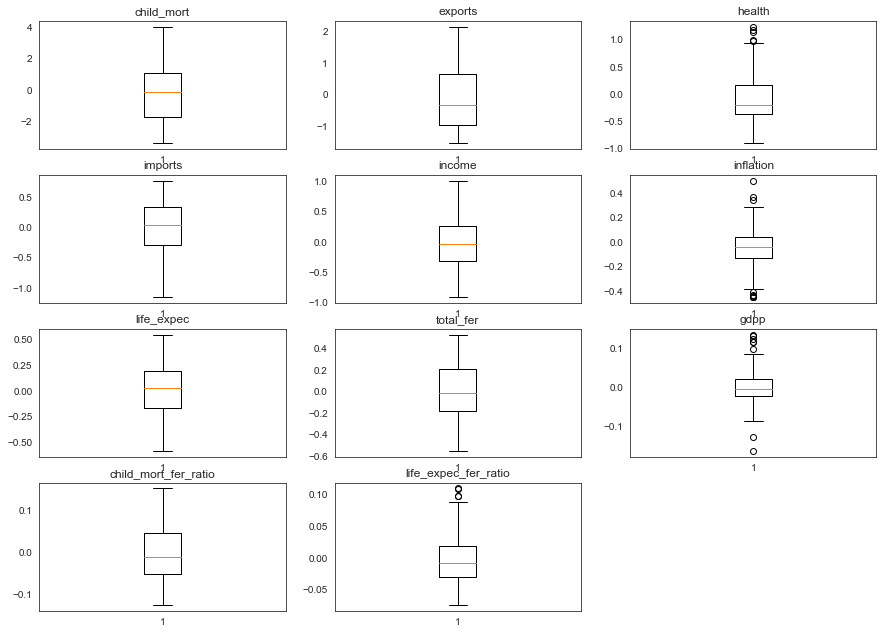

In [49]:
#Check the distribution of data for each parameter and identify any outlier
#For any variable if data is below than 5% or more than 95% than it is treated as outlier.
#As we can see even after removing these extreme points, there are data points in almost all features 
#which are extreme.

plt.figure(figsize=(15,25))
j=1
for i in df_pca_country_scaled.columns:
    
    Q1 = df_pca_country_scaled2[i].quantile(0.05)
    Q3 = df_pca_country_scaled2[i].quantile(0.95)
    IQR = Q3 - Q1
    pcs_df2 = df_pca_country_scaled2[(df_pca_country_scaled2[i] >= Q1) & (df_pca_country_scaled2[i] <= Q3)]
    
    ax=plt.subplot(9,3,j)
    plt.boxplot(pcs_df2[i])
    ax.set_title(i)
    j+=1

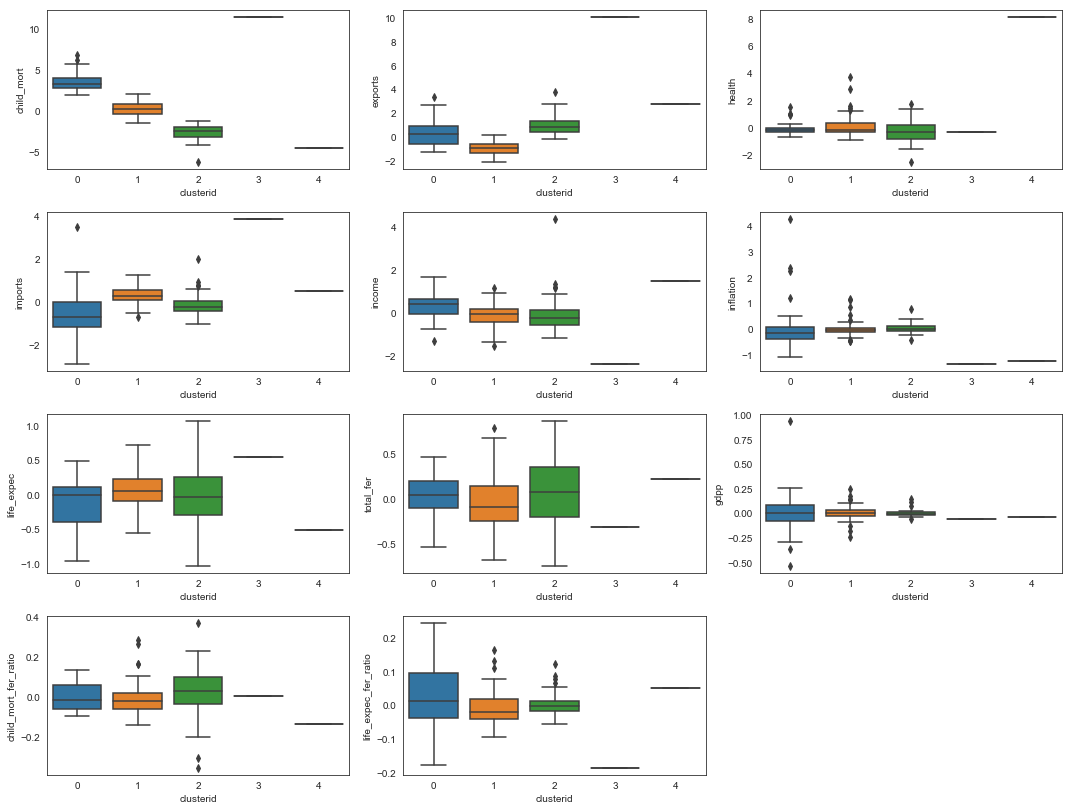

In [50]:
#Check the distribution of data for each PCA parameter for each identified cluster
#4 Clusters has only 1 country in them.

plt.figure(figsize=(15,25))
j=1
for col in df_pca_country_scaled.columns:
    plt.subplot(9,3,j)
    sns.boxplot(x='clusterid', y=col, data=df_pca_country_scaled2)
    j+=1
    
plt.tight_layout()

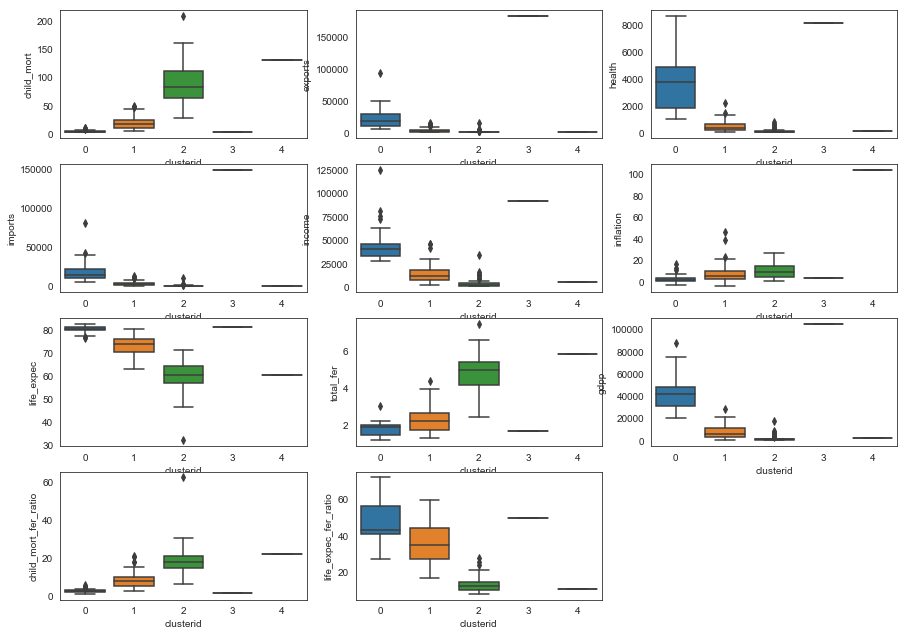

In [51]:
#Check the distribution of data for each actual parameter for each identified cluster
df_country2=df_country.drop(columns=['country'])
df_country2['clusterid']= df_pca_country_scaled2.clusterid
plt.figure(figsize=(15,25))
j=1
cols=list(df_country2.columns)
cols.remove("clusterid")
for col in cols:
    plt.subplot(9,3,j)
    sns.boxplot(x='clusterid', y=col, data=df_country2)
    j+=1

In [52]:
#List the name of countries in each cluster
i=0
while i<5:
    print ( "Clusterid :", i, " ", list(df_pca_country_scaled2['country'][df_pca_country_scaled2.clusterid==i]), "\n" )
    i+=1

Clusterid : 0   ['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States'] 

Clusterid : 1   ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, F

#### Comparision of GDPP, Chil_Mortality, Income among the different Clusters

In [53]:
df_country2=df_country.copy()
df_country2['clusterid']= df_pca_country_scaled2.clusterid
df=df_country2.groupby('clusterid')[  ['gdpp', 'child_mort','income'] ].mean().reset_index()
df['count'] = df_country2.groupby('clusterid')['clusterid'].count()
df

,clusterid,gdpp,child_mort,income,count
0,0,42045.454545,4.896970,45036.363636,33
1,1,7078.469136,19.651852,13308.765432,81
2,2,1898.588235,88.331373,3962.803922,51
3,3,105000.000000,2.800000,91700.000000,1
4,4,2330.000000,130.000000,5150.000000,1


### Visualising Clusters Using PCA Variables

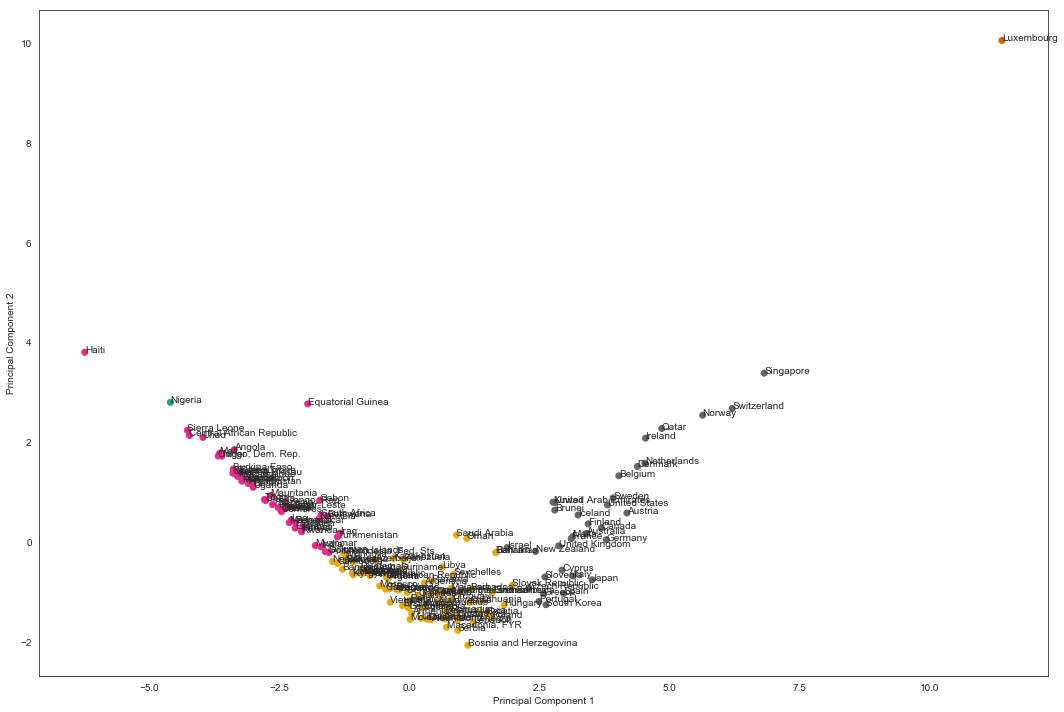

In [54]:
fig = plt.figure(figsize = (15,10))
plt.scatter(df_pca_country_scaled2.child_mort, df_pca_country_scaled2.exports, 
            c = df_pca_country_scaled2.clusterid, cmap="Dark2_r")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(df_pca_country_scaled2.country):
    plt.annotate(txt, (df_pca_country_scaled2.child_mort[i],df_pca_country_scaled2.exports[i]))
plt.tight_layout()
plt.show() 

In [55]:
#Luxembourg has good Income, GDPP and low child moratality compare to others 
#So other than these contries need this funding more.
#I am removing this from visualization

df_pca_country_scaled3 = df_pca_country_scaled2.copy()
df_pca_country_scaled3 = df_pca_country_scaled3[ ~df_pca_country_scaled3.country.isin(['Luxembourg'] ) ]
df_pca_country_scaled3.index=range( len(df_pca_country_scaled3))

### Visualize the clusters with PCA data after removing the outlier

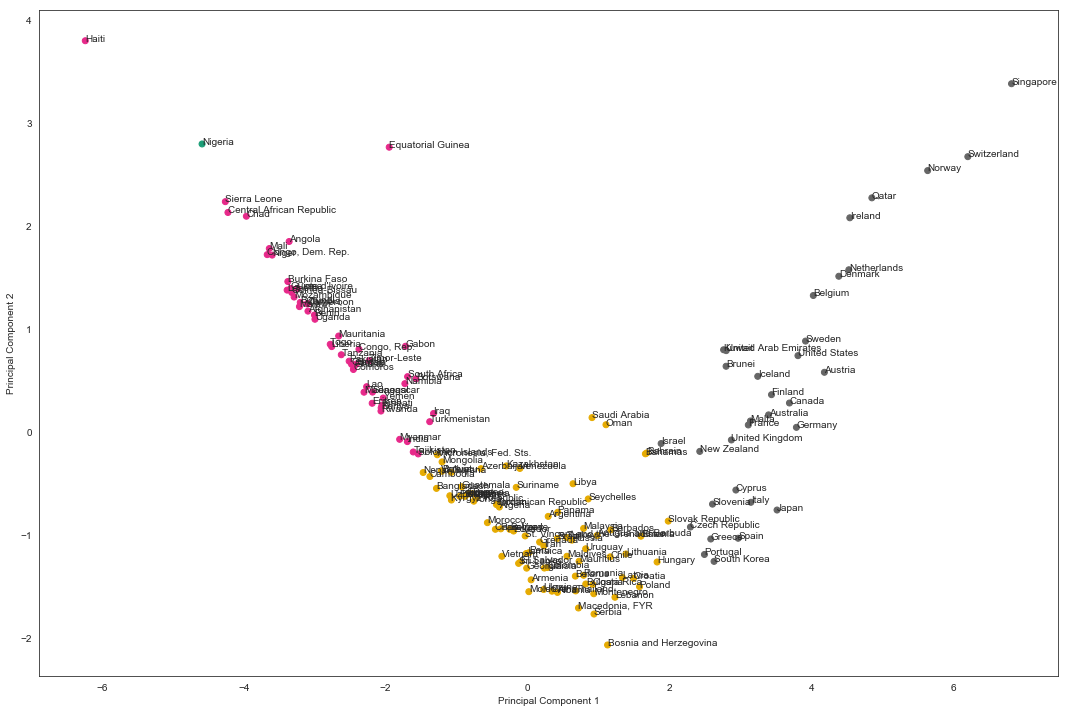

In [56]:

fig = plt.figure(figsize = (15,10))

plt.scatter(df_pca_country_scaled3.child_mort, 
            df_pca_country_scaled3.exports, 
            c = df_pca_country_scaled3.clusterid, cmap="Dark2_r")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for j, txt in enumerate(df_pca_country_scaled3.country):
     plt.annotate(txt, (df_pca_country_scaled3.child_mort[j],
                        df_pca_country_scaled3.exports[j]) )
    
plt.tight_layout()
plt.show()

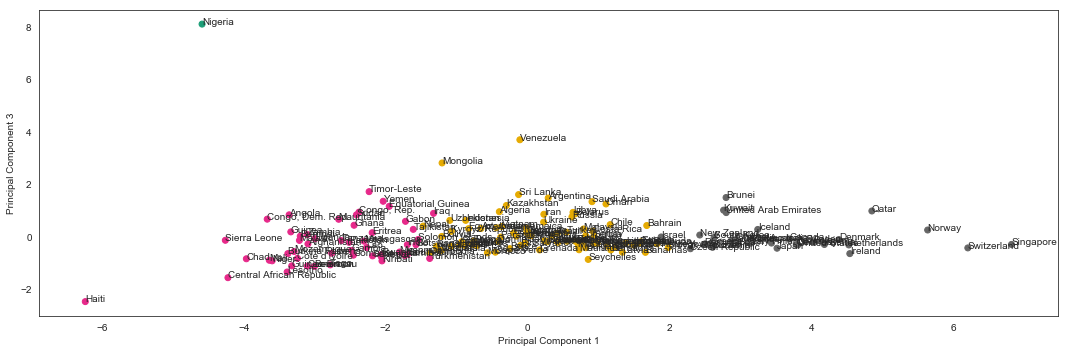

In [57]:
fig = plt.figure(figsize = (15,5))

plt.scatter(df_pca_country_scaled3.child_mort, 
            df_pca_country_scaled3.health, 
            c = df_pca_country_scaled3.clusterid, cmap="Dark2_r")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

for j, txt in enumerate(df_pca_country_scaled3.country):
    
     plt.annotate(txt, (df_pca_country_scaled3.child_mort[j],
                        df_pca_country_scaled3.health[j]) )
    
plt.tight_layout()
plt.show()

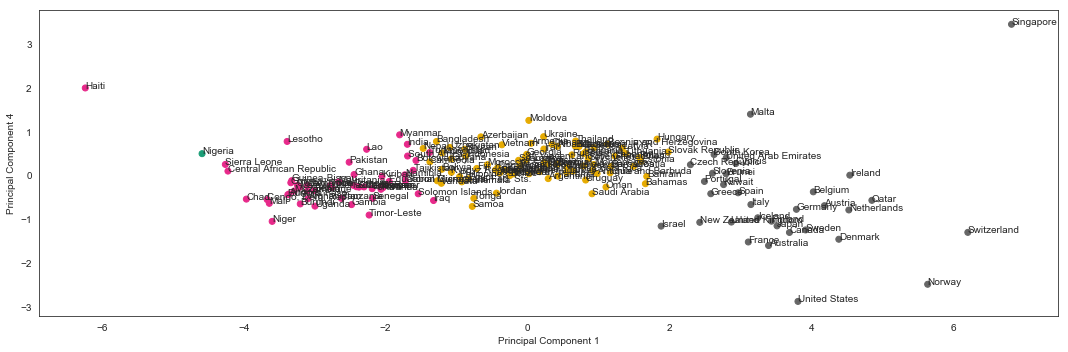

In [58]:
fig = plt.figure(figsize = (15,5))

plt.scatter(df_pca_country_scaled3.child_mort, 
            df_pca_country_scaled3.imports, 
            c = df_pca_country_scaled3.clusterid, cmap="Dark2_r")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')

for j, txt in enumerate(df_pca_country_scaled3.country):
    
     plt.annotate(txt, (df_pca_country_scaled3.child_mort[j],
                        df_pca_country_scaled3.imports[j]) )
    
plt.tight_layout()
plt.show()

### Visualize the clusters with Actual data after removing the outlier

In [59]:
df_country_ = df_country2[ ~df_country2.country.isin(['Luxembourg'] ) ]
df_country_.index=range( len(df_country_))

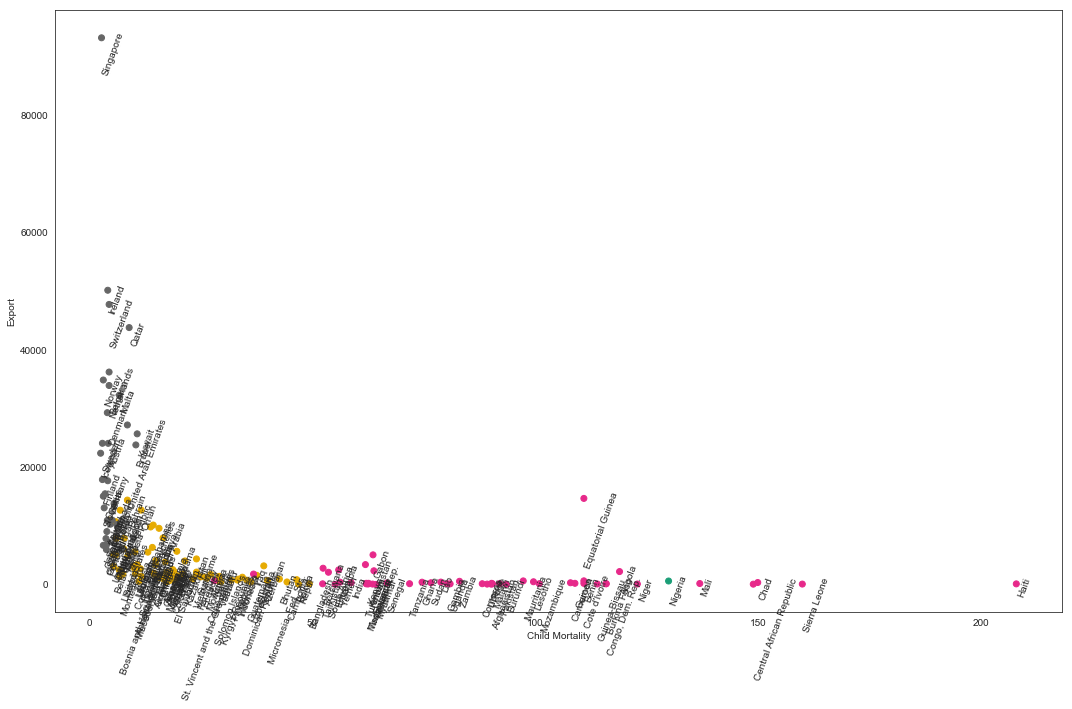

In [60]:
fig = plt.figure(figsize = (15,10))

plt.scatter(df_country_.child_mort, 
            df_country_.exports, 
            c = df_country_.clusterid, cmap="Dark2_r")

plt.xlabel('Child Mortality')
plt.ylabel('Export')

for j, txt in enumerate(df_country_.country):
    plt.annotate(txt, (df_country_.child_mort[j],
                        df_country_.exports[j]), ha='left', rotation=70 )
    
plt.tight_layout()
plt.show()

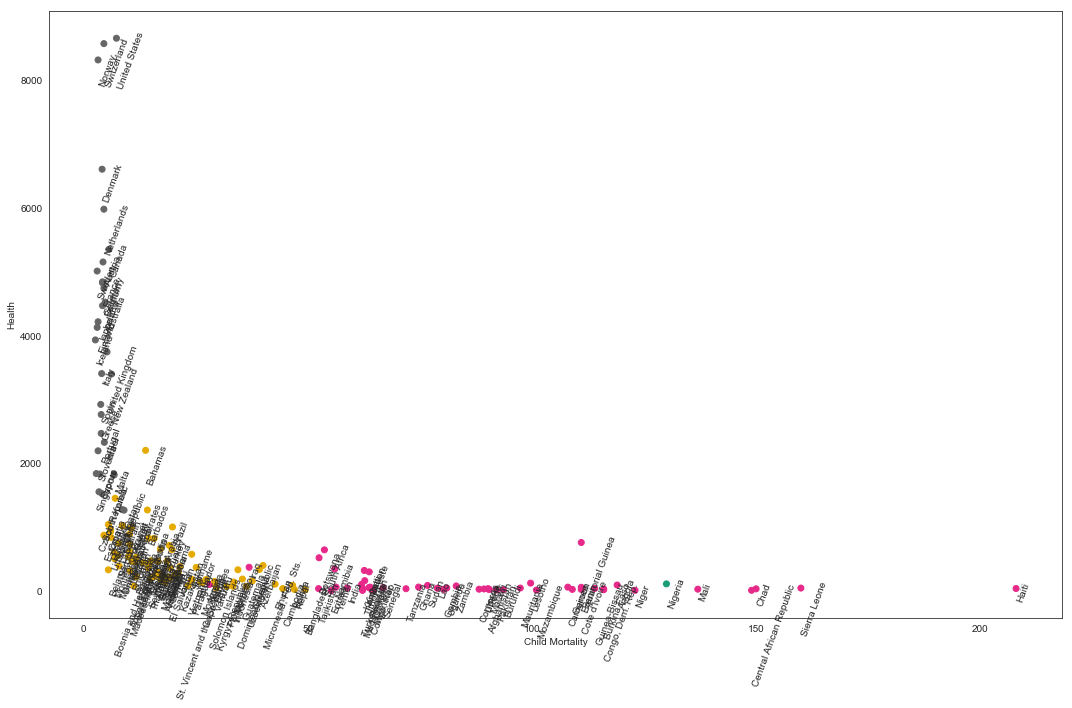

In [61]:
fig = plt.figure(figsize = (15,10))

plt.scatter(df_country_.child_mort, 
            df_country_.health, 
            c = df_country_.clusterid, cmap="Dark2_r")

plt.xlabel('Child Mortality')
plt.ylabel('Health')

for j, txt in enumerate(df_country_.country):
    plt.annotate(txt, (df_country_.child_mort[j],
                        df_country_.health[j]), ha='left', rotation=70 )
    
plt.tight_layout()
plt.show()

### 5 Countries who need the funding badly are

In [62]:
#These are the countries where High Child Mortality and Low spending on Healthcare
cnt = ['Haiti',
'Sierra Leone',
'Central African Republic',
'Chad',
'Mali']

In [63]:
df_country2[ df_country2.country.isin(cnt) ]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_fer_ratio,life_expec_fer_ratio,clusterid
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446,28.60,9.12,2
32,Chad,150.0,330.10,40.63,390.20,1930,6.39,56.5,6.59,897,22.76,8.57,2
66,Haiti,208.0,101.29,45.74,428.31,1500,5.45,32.1,3.33,662,62.46,9.64,2
97,Mali,137.0,161.42,35.26,248.51,1870,4.37,59.5,6.55,708,20.92,9.08,2
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,30.77,10.58,2


### Prediction using PCA

#### Using Clusters Created by Kmean Cluster

In [64]:
#Use only 4 PCA variables which represents 91% variation in data.
#In stead of using PC1, PC2, PC3, PC4 I am using the original variable name.

y= df_pca_country_scaled2.clusterid
X= df_pca_country_scaled2[ ['child_mort', 'exports', 'health', 'imports'] ]
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=.7, random_state=100)

In [65]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model_pca = lr.fit(X_train,y_train)

In [66]:
#predict using train data
pred_train_clusterid = model_pca.predict(X_train)

#predict using test data
pred_test_clusterid = model_pca.predict(X_test)

In [67]:
print ("Accuracy on Train Dataset :",
round(metrics.accuracy_score(y_train, pred_train_clusterid),2))

Accuracy on Train Dataset : 0.95


In [68]:
print ("Accuracy on Test Dataset :",
       round(metrics.accuracy_score(y_test, pred_test_clusterid),2))

Accuracy on Test Dataset : 0.9


In [69]:
metrics.confusion_matrix(y_train, pred_train_clusterid)

array([[19,  3,  0,  0,  0],
       [ 2, 54,  1,  0,  0],
       [ 0,  0, 35,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1]], dtype=int64)

In [70]:
metrics.confusion_matrix(y_test, pred_test_clusterid)

array([[10,  0,  0,  1],
       [ 2, 22,  0,  0],
       [ 0,  2, 14,  0],
       [ 0,  0,  0,  0]], dtype=int64)

#### Using Cluster Created by Hierarchical Clustering

In [71]:
df_pca_country_scaled2['clusterid']= cluster_labels_hc

y= df_pca_country_scaled2.clusterid
X= df_pca_country_scaled2[ ['child_mort', 'exports', 'health', 'imports'] ]
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=.7, random_state=100)

In [72]:
#Training the model on the train data
lr = LogisticRegression()

model_pca = lr.fit(X_train,y_train)

In [73]:
#predict using train data
pred_train_clusterid = model_pca.predict(X_train)

#predict using test data
pred_test_clusterid = model_pca.predict(X_test)

In [74]:
print ("Accuracy on Train Dataset :",
round(metrics.accuracy_score(y_train, pred_train_clusterid),2))

Accuracy on Train Dataset : 0.98


In [75]:
print ("Accuracy on Test Dataset :",
       round(metrics.accuracy_score(y_test, pred_test_clusterid),2))

Accuracy on Test Dataset : 0.98


### Learning and Prediction both are better when we train the model using Hierarchical Clustering